## Problem 2

The Gauss error function is given by

$ \text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt. $

It turns out that this function can not be written in terms of elementary functions (polynomials, trigonometric and exponential functions etc.). Our goal is to use elementary functions to approximate $\text{erf}(x)$ on the interval [0,2] in three different ways. The motivation is the following: If we can find a good approximation, we don’t have to compute (a numerical approximation of) an integral every time we need to compute $\text{erf}(x_0)$ for some $x_0 \in [0,2]$.

### (a) 
**Compute the 5 first derivatives of $\text{erf}(x)$ and their values at $x = 0$:**

$ \text{erf}(0), \text{erf}'(0), \dots, \text{erf}^{(5)}(0). $

**Write down the 5th-degree Taylor polynomial of $\text{erf}(x)$ around $x = 0$ and denote it by $T_5(x)$. What is the multiplicity of the root $x = 0$ of $\text{erf}(x)$?** 
(The fundamental theorem of calculus may be useful in this exercise.)

See for example [https://en.wikipedia.org/wiki/Error_function](https://en.wikipedia.org/wiki/Error_function).

**All a) done by hand**

### (b)

**Consider the points $(x_1, y_1), \dots, (x_5, y_5)$ given by:**

\begin{align*}
x_1 &= 0, \\
x_2 &= \frac{1}{2}, \\
x_3 &= 1, \\
x_4 &= \frac{3}{2}, \\
x_5 &= 2
\end{align*}

and 

$$ y_i = e^{-x_i^2} \quad \text{for} \quad i = 1, \dots, 5. $$

**Find the 4th-degree interpolating polynomial** $P_4(x)$ 
**of these points, and compute its anti-derivative. Find the polynomial**
$$ P_5(x) = \int_0^x P_4(t) dt. $$

**Do you expect $P_5(x)$ to be a good approximation to $\text{erf}(x)$?**


Given the set of points $$((x_1, y_1), (x_2, y_2), \dots, (x_5, y_5))$$ where $$( y_i = e^{-x_i^2} ) \quad \text{for} \quad ( i = 1, \dots, 5 )$$ our goal is to determine an interpolating polynomial, P4(x), of degree 4 that fits these points. 

Steps to approach the solution:

1. **Determine P4(x):** Using the Lagrange interpolating polynomial formula, we'll compute P4(x) that passes through the given points.

2. **Compute the Antiderivative P5(x):** The polynomial (P5(x)) is the antiderivative of (P4(x)). We'll evaluate this antiderivative from 0 to x in order to get P5(x).

3. **Visualization:** We'll plot both P4(x) and P5(x) over a specified domain to visually understand how they behave with respect to the given points.

By the end of this exercise, we'll have a better understanding of how well P4(x) fits the given points and how P5(x), its antiderivative, behaves over the interval. This visualization will also help us infer if P5(x) is a good approximation to the error function $(\text{erf}(x))$.


P4(x) = -0.21 * x^0 + 1.07 * x^1 + -1.63 * x^2 + 0.13 * x^3 + 1.00 * x^4

P5(x) = Antiderivative of P4(x) = -0.21 * x^1 + 0.54 * x^2 + -0.54 * x^3 + 0.03 * x^4 + 0.20 * x^5

P4(2) = 12.460812529142482

P5(x) = Antiderivative of P4 evaluated from x=0 to x=2 = 4.308286154694821


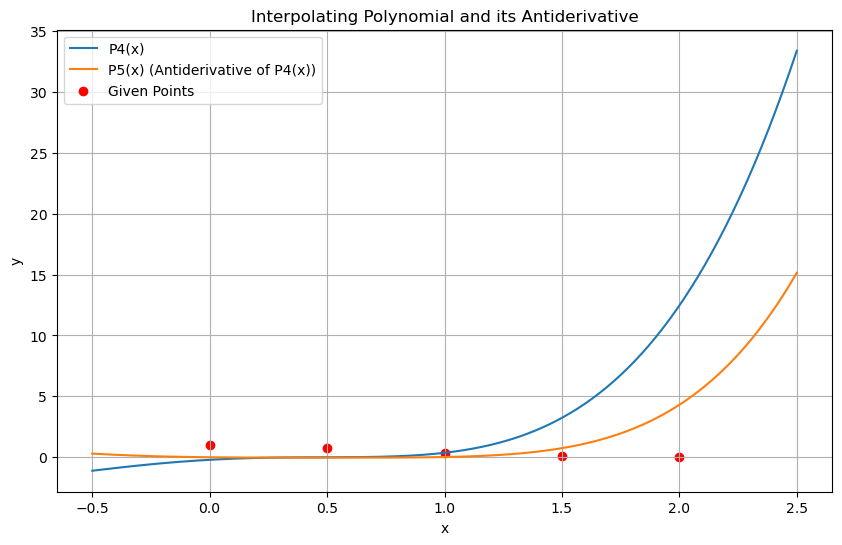

In [73]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

# Given points
x_points = [0, 1/2, 1, 3/2, 2]
y_points = [np.exp(-x**2) for x in x_points]

# Find the interpolating polynomial
poly = lagrange(x_points, y_points)

# Convert it to a Polynomial object to find antiderivative
p = Polynomial(poly.coefficients)

# Compute the antiderivative
antiderivative = p.integ()

#For future calls to this polynomial
def get_P5_antiderivative():
    return antiderivative

# Better formatted print
def polynomial_to_string(p):
    terms = ["{0:.2f} * x^{1}".format(coef, i) for i, coef in enumerate(p.coef) if coef != 0]
    return " + ".join(terms)

print(f"P4(x) = {polynomial_to_string(p)}")
print(f"\nP5(x) = Antiderivative of P4(x) = {polynomial_to_string(antiderivative)}")

# Evaluate polynomial and its antiderivative at x=2
x_eval = 2
print(f"\nP4({x_eval}) = {p(x_eval)}")
print(f"\nP5(x) = Antiderivative of P4 evaluated from x=0 to x={x_eval} = {antiderivative(x_eval) - antiderivative(0)}")

# Plotting
x = np.linspace(-0.5, 2.5, 400)
y_poly = p(x)
y_antiderivative = [antiderivative(xi) - antiderivative(0) for xi in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y_poly, label="P4(x)")
plt.plot(x, y_antiderivative, label="P5(x) (Antiderivative of P4(x))")
plt.scatter(x_points, y_points, color='red', marker='o', label='Given Points')
plt.title("Interpolating Polynomial and its Antiderivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### (c) 
**Given the function:**

$ f(x) = 1 - \left( \frac{c_1}{1 + 0.47047x} + \frac{c_2}{(1 + 0.47047x)^2} + \frac{c_3}{(1 + 0.47047x)^3} \right) e^{-x^2} $

which is parameterized by the coefficients $(c_1),\quad (c_2) \quad \text{and} \quad (c_3)$. 


Let's define four ordered and equally spaced points on the interval [0,2] as: $(x_1 = 0$), $(x_4 = 2$), and by implication, $(x_2$) and $(x_3$) are the midpoints. The corresponding $(y$) values are given by the error function, such that:

$[ y_i = \text{erf}(x_i) $]

for $(i = 1, 2, 3, 4$). Using approximate numerical values:

$[ y_1 = 0.0, $]
$[ y_2 = 0.65422141, $]
$[ y_3 = 0.94065356, $]
$[ y_4 = 0.99532227. $]

While these values can typically be determined via numerical integration, for the purposes of this exercise, they are provided directly.

The task at hand is to demonstrate that the conditions $(y_1 = f(x_1)$), $(y_4 = f(x_4)$) and so on, can be formulated as a linear system of equations based on the coefficients $(c_1$), $(c_2$), and $(c_3$). The key questions to address:

- **Is this system consistent (i.e., does it possess a solution)?**
- **What is the least squares solution of this system?**
- **How well does this least squares solution approximate the error function, $( \text{erf}(x) $)?**

To determine if the system is consistent, We can form the augmented matrix for the system and then attempt to row reduce it to its *Reduced Row Echelon Form (RREF)*. If any row in the RREF is all zeros except for the last entry (corresponding to the augmented part), the system is inconsistent. Otherwise, it is consistent.

However, considering the problem's context, we're dealing with an over-determined system (more equations than unknowns). In general, such systems are often inconsistent, but We can find an approximate solution using the *least squares method*.


In [5]:
# Define the function
def f(x, c1, c2, c3):
    return 1 - (c1 / (1 + 0.47047*x) + c2 / (1 + 0.47047*x)**2 + c3 / (1 + 0.47047*x)**3) * np.exp(-x**2)

# Given points
x_values = [0, 0.8, 1.4, 2]
y_values = [0, 0.65242141, 0.94065356, 0.99532227]

# Construct the A matrix and b vector
A = np.zeros((len(x_values), 3))
for i, x in enumerate(x_values):
    A[i, 0] = (1 / (1 + 0.47047*x)) * np.exp(-x**2)
    A[i, 1] = (1 / (1 + 0.47047*x)**2) * np.exp(-x**2)
    A[i, 2] = (1 / (1 + 0.47047*x)**3) * np.exp(-x**2)

b = y_values - np.array([1]*len(y_values))

# Check the ranks
rank_A = np.linalg.matrix_rank(A)
augmented_matrix = np.column_stack([A, b])
rank_Augmented = np.linalg.matrix_rank(augmented_matrix)

# Determine if the system is consistent
if rank_A == rank_Augmented:
    print("The system is consistent.")
else:
    print("The system is inconsistent.")


The system is inconsistent.


In [6]:
import numpy as np

# Given data
x_values = [0, 0.8, 1.4, 2]
y_values = [0, 0.65242141, 0.94065356, 0.99532227]

# Construct the A matrix
A = np.zeros((len(x_values), 3))
for i, x in enumerate(x_values):
    A[i, 0] = (1 / (1 + 0.47047*x)) * np.exp(-x**2)
    A[i, 1] = (1 / (1 + 0.47047*x)**2) * np.exp(-x**2)
    A[i, 2] = (1 / (1 + 0.47047*x)**3) * np.exp(-x**2)

b = y_values - np.array([1]*len(y_values))

# Compute the least squares solution
c_values, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Least squares solution (c1, c2, c3):", c_values)

# If residuals are returned, display the sum of squared residuals
if residuals:
    print("Sum of squared residuals:", residuals[0])


Least squares solution (c1, c2, c3): [ 1.80025657 -6.18771876  3.38746208]
Sum of squared residuals: 4.801519955036637e-09


In the context of approximating the error function $ \text{erf}(f(x)) $, 
the least squares solution minimizes the sum of the squares of the differences between the observed values $ y_i $ and the values predicted by the function $ f(x_i) $. This means that, while it might not fit the given points exactly, it provides the "best fit" in the sense of minimizing the overall error (in a squared sense) across all the given points.


Now, **We have to choose the values for $( c_1, c_2, c_3 )$ found above and plot the graph of $ f(x) $ in a coordinate system together with the graphs of $ T_5(x) $ and $ P_5(x) $ and see We you can find an approximation similar to our function $ f(x) $ on the webpage in Footnote 1 (https://en.wikipedia.org/wiki/Error_function).**


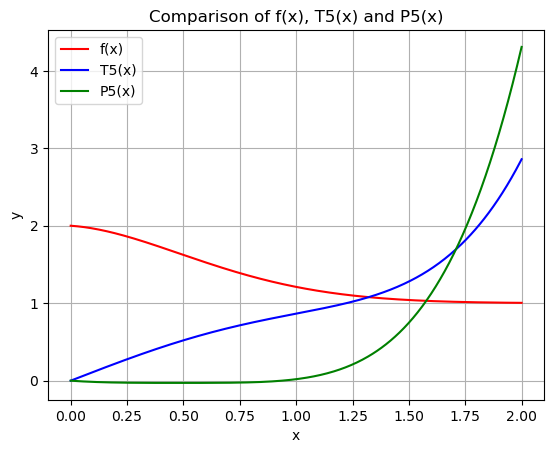

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Given points
x_values = [0, 0.8, 1.4, 2]
y_values = [0, 0.65242141, 0.94065356, 0.99532227]

# Given values (you might have to replace these with the ones you found)
coefficients = c_values
c1, c2, c3 = coefficients

# Define f(x)
def f(x):
    return 1 - (c1 / (1 + 0.47047*x) + c2 / (1 + 0.47047*x)**2 + c3 / (1 + 0.47047*x)**3) * np.exp(-x**2)

# Define T5(x) (replace with actual definition)
def T5(x):
    """Approximate erf using T5"""
    return (2*np.sqrt(np.pi)*x/np.pi) - (2*np.sqrt(np.pi)*x**3/(3*np.pi)) + (np.sqrt(np.pi)*x**5/(5*np.pi))

# Define P5(x) (replace with actual definition)   
antiderivative = get_P5_antiderivative()
def P5(x):
    return antiderivative(x) - antiderivative(0) 

# Create an array of x values for plotting
x_values = np.linspace(0, 2, 400)

# Plot each function
plt.plot(x_values, f(x_values), label='f(x)', color='red')
plt.plot(x_values, T5(x_values), label='T5(x)', color='blue',)
plt.plot(x_values, P5(x_values), label='P5(x)', color='green',)

# Set the title and labels
plt.title("Comparison of f(x), T5(x) and P5(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


The similarities in polynomial structure, behavior near 0, and the context given about approximating the error function hint at a relationship between f(x) and the Maclaurin series approximation of erf(x)

Now, **We are going to do a rough test of our 3 approximations T5(x), P5(x)
and f(x) of erf(x) that we found in (a)-(c). For this we need to know a
sufficiently precise approximation of erf(x0) for some x0 ∈ [0, 2]. 
Taking for example x0 = 2:**

Is the erf(x) imported from the library the same as we have put before? -> True
The precise approximation of erf(2) is: 0.995322
Difference between T5(2) and precise value: 1.863238
Difference between P5(2) and precise value: 3.312964
Difference between f(2) and precise value: 0.009288


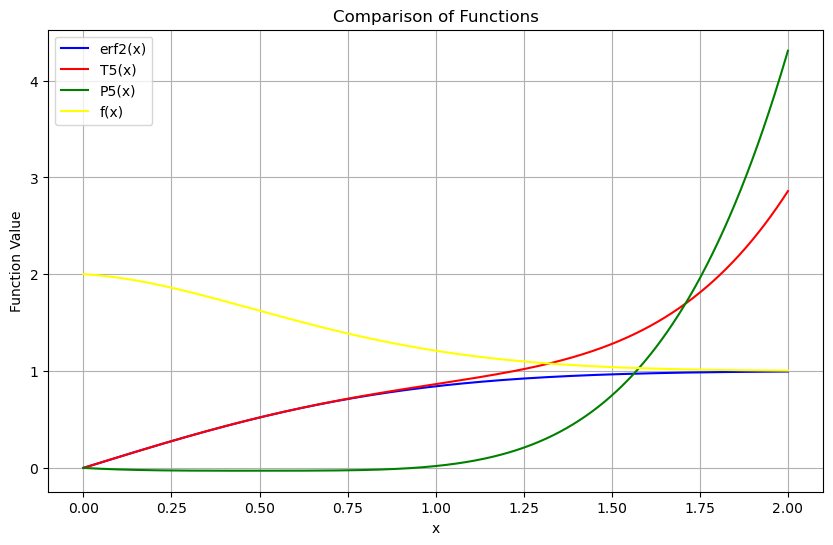

A zoom when x = 2:


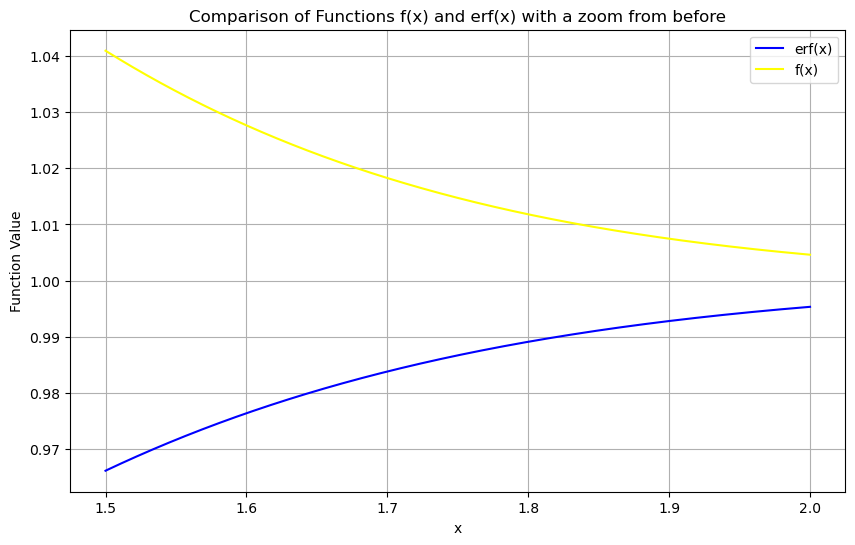

In [67]:
import numpy as np
from scipy.special import erf    #We have the erf(x) function in a library of python
from scipy.integrate import quad

#But We can put the function erf(x) like it was provided at first in Problem 2
def integrand(t):
    return np.exp(-t**2)

def erf2(x):     #This is the function erf(x) from Problem 2 that We are going to see if it is the same as the library
    integral, _ = quad(integrand, 0, x)
    return (2/np.sqrt(np.pi)) * integral

# Define your approximations (you might need to replace these with your actual functions)
def T5(x):
    return (2*np.sqrt(np.pi)*x/np.pi) - (2*np.sqrt(np.pi)*x**3/(3*np.pi)) + (np.sqrt(np.pi)*x**5/(5*np.pi))

antiderivative = get_P5_antiderivative()
def P5(x):
    return antiderivative(x) - antiderivative(0) 

def f(x):
    return 1 - (c1 / (1 + 0.47047*x) + c2 / (1 + 0.47047*x)**2 + c3 / (1 + 0.47047*x)**3) * np.exp(-x**2)

# Evaluate the approximations at x = 2
T5_result = T5(2)
P5_result = P5(2)
f_result = f(2)

# Precise approximation of erf(2)
precise_value = erf(2)
precise_value2 = erf2(2)
comparison_result = f"{precise_value:.15}" == f"{precise_value2:.15f}"
print(f"Is the erf(x) imported from the library the same as we have put before? -> {comparison_result}")

# Calculate the differences
T5_diff = abs(T5_result - precise_value)
P5_diff = abs(P5_result - precise_value)
f_diff = abs(f_result - precise_value)

# Display the results
print(f"The precise approximation of erf(2) is: {precise_value:.6f}")
print(f"Difference between T5(2) and precise value: {T5_diff:.6f}")
print(f"Difference between P5(2) and precise value: {P5_diff:.6f}")
print(f"Difference between f(2) and precise value: {f_diff:.6f}")

#Now We are going to plot it all to have a graph view on the different functions
# Values for x
x_values = np.linspace(0, 2, 1000)

# Calculate the function values
erf2_values = [erf2(x) for x in x_values]
T5_values = [T5(x) for x in x_values]
P5_values = [P5(x) for x in x_values]
f_values = [f(x) for x in x_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, erf2_values, label='erf2(x)', color='blue')
plt.plot(x_values, T5_values, label='T5(x)', color='red')
plt.plot(x_values, P5_values, label='P5(x)', color='green')
plt.plot(x_values, f_values, label='f(x)', color='yellow')

# Annotations and display
plt.title('Comparison of Functions')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

#A zoom when x = 2:
print("A zoom when x = 2:")
x_values = np.linspace(1.5, 2, 1000)

# Calculate the function values
erf2_values = [erf2(x) for x in x_values]
T5_values = [T5(x) for x in x_values]
P5_values = [P5(x) for x in x_values]
f_values = [f(x) for x in x_values]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, erf2_values, label='erf(x)', color='blue')
plt.plot(x_values, f_values, label='f(x)', color='yellow')

# Annotations and display
plt.title('Comparison of Functions f(x) and erf(x) with a zoom from before')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()


The composite trapezoid rule states that the integral 
$ \int_{a}^{b} e^{-t^2} dt $
can be approximated by considering an evenly spaced grid of points:

$ t_0 = a < t_1 < \dots < t_N = b $

and computing 

$ I_h = \frac{h}{2} \left( e^{-a^2} + e^{-b^2} + 2 \sum_{i=1}^{N-1} e^{-t_i^2} \right) $

where $ h = t_i - t_{i-1} $. This is what you get by applying the trapezoid rule to each subinterval $(t_i, t_{i+1})$ and adding all the results together.

### d)
**Split [0,2] into 2000 subintervals,**

$ [0, 10^{-3}], [10^{-3} \times 2, 10^{-3}], [2 \times 10^{-3}, 3 \times 10^{-3}], \dots, [1999 \times 10^{-3}, 2] $

**and find an approximation of $ \text{erf}(2) $ by applying the composite trapezoid rule for the corresponding grid of points.** You are not allowed to do this by hand.


In [69]:
import numpy as np

def trapezoid_rule(func, x_values):  #faster for large arrays due to numpy optimizations.
    y_values = func(x_values)
    # Calculate the trapezoid rule approximation using non-uniformly spaced x-values
    dx = np.diff(x_values) # Differences between consecutive x-values
    avg_y = 0.5 * (y_values[1:] + y_values[:-1])  # Averages of consecutive y-values
    integral = np.sum(dx * avg_y)
    return integral

#We could do the approximation in this way too:
def trapezoid_rule2(func, x_values):  #slower for large arrays but more intuitive to read
    y_values = func(x_values)
    # Calculate the trapezoid rule approximation for non-uniformly spaced x-values
    integral = sum(0.5 * (x_values[j] - x_values[j-1]) * (y_values[j] + y_values[j-1]) for j in range(1, len(x_values)))
    return integral

"""For both trapezoid rules:

    Approximate the integral of func over the provided x_values using
    the composite trapezoid rule.
    
    Parameters:
    - func: Function to be integrated.
    - x_values: Array of x-values that define the intervals.
    
    Returns:
    - Approximation of the integral.
"""

# Define the function to be integrated
def g(t):
    """Function to be integrated."""
    return np.exp(-t**2)

# Split [0,2] into 2000 subintervals
# Parameters for the integration
a, b = 0, 2
N = 2000
x_values = np.linspace(a, b, N+1)  # N+1 points make N subintervals

# Calculate the integral using the trapezoid rule
result = trapezoid_rule(g, x_values)
print(f"Approximation of erf(2) using composite trapezoid rule is: {result:.6f}")

# Calculate the integral using the trapezoid rule
result = trapezoid_rule2(g, x_values)
print(f"Approximation of erf(2) using the second composite trapezoid rule is: {result:.6f}")




Approximation of erf(2) using composite trapezoid rule is: 0.882081
Approximation of erf(2) using the second composite trapezoid rule is: 0.882081


I figured out later that the approximation was considering an evenly spaced grid of points. 
It simplifies the process quite a bit, I am going to do it now:

In [81]:
def composite_trapezoid_rule(func, a, b, N):
    """Compute the integral of func from a to b using the composite trapezoid rule with N evenly spaced points.
    """
    # Create evenly spaced x-values
    t_values = np.linspace(a, b, N+1)
    y_values = func(t_values)
    # Calculate the spacing (h)
    h = t_values[1] - t_values[0]
    # Compute the sum for internal points
    internal_sum = np.sum(y_values[1:-1])
    # Apply the composite trapezoid formula
    integral = (h/2) * (y_values[0] + y_values[-1] + 2*internal_sum)
    return integral

# Define the function to be integrated
def g(t):
    """Function to be integrated."""
    return np.exp(-t**2)

# Split [0,2] into 2000 subintervals
# Parameters for the integration
a, b = 0, 2
N = 2000

# Calculate the integral using the trapezoid rule
result = composite_trapezoid_rule(g, a, b, N)
print(f"Approximation of erf(2) using composite trapezoid rule is: {result:.6f}")


Approximation of erf(2) using composite trapezoid rule is: 0.882081


### (e)
**Use a result from the textbook to explain that:**

$ | I_h - \int_a^b e^{-t^2} dt | = \frac{(b-a)^2}{12} (4c^2 - 2)e^{-c^2} $

for some $ c $ between $ a $ and $ b $. **Use this to show that the approximation of $\text{erf}(2)$ that you found using the composite trapezoid rule is correct within at least 5 decimal places.** This is a relatively coarse estimate of the error. The real error is somewhat smaller than this. (Hint: Remember that $ e^{-C} \leq 1 $ for $ C \geq 0 $)

When we apply the trapezoidal rule to approximate the definite integral of a function, there's an associated error term that can be estimated. For a twice continuously differentiable function $f$ on the interval $[a, b]$, the error bound for the composite trapezoidal rule is generally expressed as:

$$
E_T = -\frac{(b-a)h^2}{12}f''(\xi)
$$

where $h$ is the width of each subinterval (in the case of the composite rule), and $\xi$ is some value in the interval $[a, b]$ where $f''(t)$ reaches its maximum absolute value.

*Specific Case for $f(t) = e^{-t^2}$:*

For the function $f(t) = e^{-t^2}$, its second derivative is:

$$
f''(t) = (4t^2 - 2)e^{-t^2}
$$

Applying the error formula, we get:

$$
| I_h - \int_a^b e^{-t^2} dt | = \frac{(b-a)^2}{12} (4c^2 - 2)e^{-c^2}
$$

where $c$ is a value in the interval $[a, b]$ that maximizes the absolute value of the second derivative $f''(t)$. This specific form of the error term takes into account the behavior of $f(t)$, adjusting the general error bound to the characteristics of the exponential function.

For the interval $[a, b]$, finding the exact value of $c$ that maximizes $|f''(t)|$ requires additional analysis or numerical optimization, as it's not necessarily the midpoint $\frac{a+b}{2}$, nor is it straightforward to determine analytically for this function.

In practical terms, we may choose a value of $c$ within our interval to provide a safe estimate for the error. This conservative approach ensures that our error bound is reliable even if we cannot determine the exact maximum of $|f''(t)|$.

I am going to run a python code in order to get an approximation of $\text{erf}(2)$ using the composite trapezoidal rule to see that is within the desired accuracy of 5 decimal places:


In [12]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erf

# Function to be integrated
def f(t):
    return np.exp(-t**2)

# The composite trapezoidal rule
def composite_trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    I_h = h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))
    return I_h

# Error estimation for erf(x)
def error_estimate(a, b, n):
    # Estimate the error (error bound formula for trapezoidal rule)
    error_bound = ((b-a)**3 / (12 * n**2)) * np.abs(4*b**2 - 2) * np.exp(-b**2)
    return error_bound

# Parameters
a = 0
b = 2
n = 100  # Number of subintervals

# Trapezoidal rule approximation
I_h = composite_trapezoidal_rule(a, b, n)

# Convert integral approximation to erf approximation
erf_approx = 2/np.sqrt(np.pi) * I_h

# Calculate the error estimate
error_bound = error_estimate(a, b, n)

# Actual value of erf(2)
actual_erf2 = erf(2)

# Actual error
actual_error = np.abs(erf_approx - actual_erf2)

# Display the results
print(f"Approximation of erf(2) using the composite trapezoidal rule: {erf_approx}")
print(f"Estimated error bound: {error_bound}")
print(f"Actual error: {actual_error}")

# Check if the actual error is within the desired accuracy
desired_accuracy = 5e-6
print(f"Is the approximation within the desired accuracy? {'Yes' if actual_error < desired_accuracy else 'No'}")


Approximation of erf(2) using the composite trapezoidal rule: 0.9953195096046127
Estimated error bound: 1.70945962961519e-05
Actual error: 2.7554143400276843e-06
Is the approximation within the desired accuracy? Yes


### (f)
**Assess the accuracy of each of your estimates $ T_5(x) $, $ P_5(x) $, $ f(x) $ by evaluating these functions at $ x = 2 $ and comparing to your answer in (d). Which approximation looks like the best one?**

It seems that the best approximation at x = 2 is the f(x) from c), I am going to plot the functions and print all of the values from the differences of the erf(x) with all the approximations in x = 2 To see all better:

The precise approximation of erf(2) is: 0.995322
Difference between T5(2) and precise value: 1.863238
Difference between P5(2) and precise value: 3.312964
Difference between f(2) and precise value: 0.009288
Difference between Composite Trapezoid approximation at x=2 and precise value: 0.113241


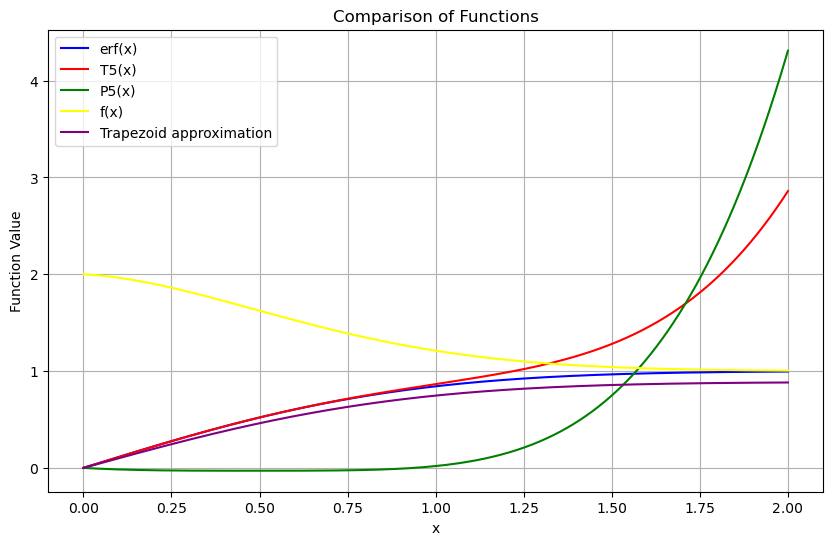

In [83]:
import numpy as np
from scipy.special import erf    
from scipy.integrate import quad


# Define your approximations (you might need to replace these with your actual functions)
def T5(x):
    return (2*np.sqrt(np.pi)*x/np.pi) - (2*np.sqrt(np.pi)*x**3/(3*np.pi)) + (np.sqrt(np.pi)*x**5/(5*np.pi))

antiderivative = get_P5_antiderivative()
def P5(x):
    return antiderivative(x) - antiderivative(0) 

def f(x):
    return 1 - (c1 / (1 + 0.47047*x) + c2 / (1 + 0.47047*x)**2 + c3 / (1 + 0.47047*x)**3) * np.exp(-x**2)

# Evaluate the approximations at x = 2
T5_result = T5(2)
P5_result = P5(2)
f_result = f(2)
trapez_result = composite_trapezoid_rule(g, 0, 2, 2001)

# Precise approximation of erf(2)
precise_value = erf(2)

# Calculate the differences
T5_diff = abs(T5_result - precise_value)
P5_diff = abs(P5_result - precise_value)
f_diff = abs(f_result - precise_value)
trapez_diff = abs(trapez_result - precise_value)

# Display the results
print(f"The precise approximation of erf(2) is: {precise_value:.6f}")
print(f"Difference between T5(2) and precise value: {T5_diff:.6f}")
print(f"Difference between P5(2) and precise value: {P5_diff:.6f}")
print(f"Difference between f(2) and precise value: {f_diff:.6f}")
print(f"Difference between Composite Trapezoid approximation at x=2 and precise value: {trapez_diff:.6f}")

#Now We are going to plot it all to have a graph view on the different functions
# Values for x
x_values = np.linspace(0, 2, 1000)

# Calculate the function values
erf_values = [erf(x) for x in x_values]
T5_values = [T5(x) for x in x_values]
P5_values = [P5(x) for x in x_values]
f_values = [f(x) for x in x_values]
trapez_values = [composite_trapezoid_rule(g, 0, x, 2001) for x in x_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, erf_values, label='erf(x)', color='blue')
plt.plot(x_values, T5_values, label='T5(x)', color='red')
plt.plot(x_values, P5_values, label='P5(x)', color='green')
plt.plot(x_values, f_values, label='f(x)', color='yellow')
plt.plot(x_values, trapez_values, label='Trapezoid approximation', color='purple')

# Annotations and display
plt.title('Comparison of Functions')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()



**Thank you very much for reading it.**

**Best Regards,**

**Antonio M. Luque Molina**